<a href="https://colab.research.google.com/github/lexxai/goit_python_ds_hw_03/blob/main/Lection_3_prepare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lection 3

In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [400]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [401]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GoIT/datasets/NY-House-Dataset.csv")
df.shape

(4801, 17)

In [402]:
df.sample(3)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
4664,Brokered by CENTURY 21 Professional Realty,Co-op for sale,410000,2,1.0,2184.207862,84-51 Beverly Rd Unit 5S,"Kew Gardens, NY 11415","84-51 Beverly Rd Unit 5SKew Gardens, NY 11415",New York,Queens County,Queens,Kew Gardens,8451,"8451 Beverly Rd Apt 5f, Kew Gardens, NY 11415,...",40.707660,-73.831160
2421,"Brokered by Robert DeFalco Realty, Inc.",Townhouse for sale,530000,3,2.0,1280.000000,14 Long Pond Ln,"Staten Island, NY 10304","14 Long Pond LnStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Long Pond Lane,"14 Long Pond Ln, Staten Island, NY 10304, USA",40.615566,-74.080285
15,Brokered by Awaye Realty,Condo for sale,549000,2,2.0,1000.000000,4654 Amboy Rd Unit 2B,"Staten Island, NY 10312","4654 Amboy Rd Unit 2BStaten Island, NY 10312",New York,Richmond County,Staten Island,Annadale,4654,"4654 Amboy Rd #2b, Staten Island, NY 10312, USA",40.540621,-74.167163


In [403]:
data_columns=("PROPERTYSQFT", "PRICE")

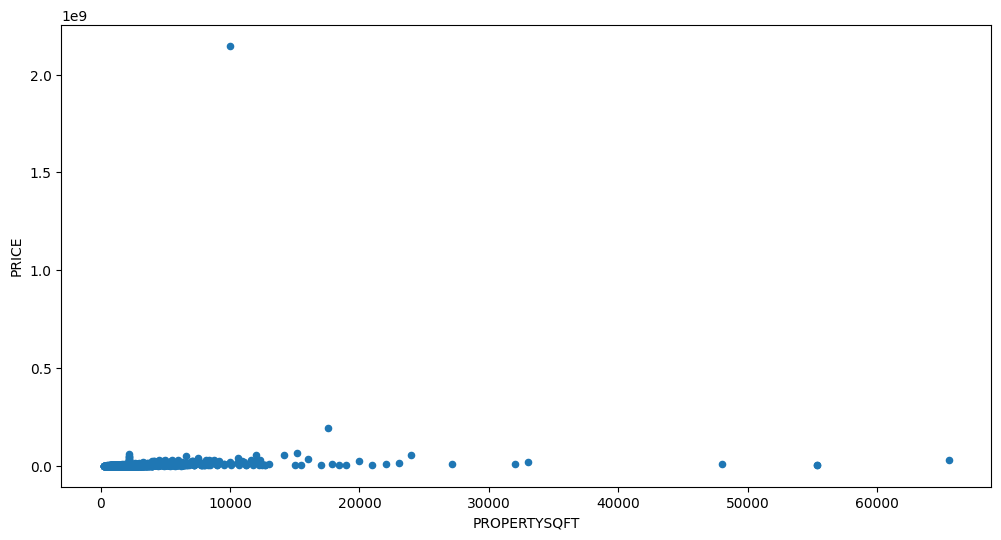

In [404]:
df.plot(x='PROPERTYSQFT', y='PRICE', kind='scatter', figsize=(12,6))
plt.show()

In [405]:
mean_price = df.PRICE.mean()
mean_price

2356940.17100604

In [406]:
df.PRICE.describe()


count    4.801000e+03
mean     2.356940e+06
std      3.135525e+07
min      2.494000e+03
25%      4.990000e+05
50%      8.250000e+05
75%      1.495000e+06
max      2.147484e+09
Name: PRICE, dtype: float64

In [407]:
int(df.PRICE.describe()['75%'])

1495000

In [408]:
1.495000e+06/df.PRICE.mean()

0.6342969662067712

In [409]:
limit_price = int(df.PRICE.describe()['75%']*10)
print(limit_price)

14950000


In [410]:
df_clear = df[df['PRICE'] < limit_price ]
df_clear.shape

(4705, 17)

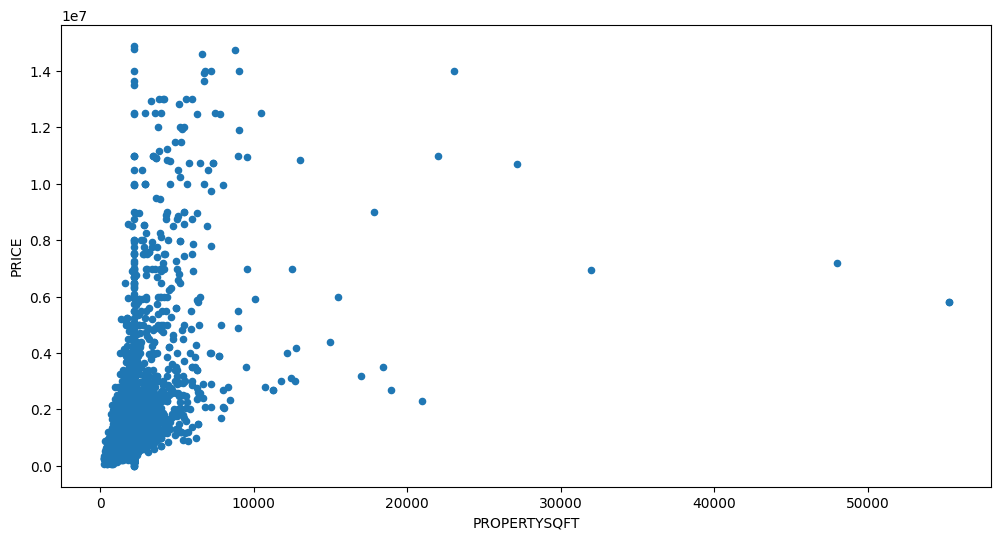

In [411]:
df_clear.plot(x='PROPERTYSQFT', y='PRICE', kind='scatter', figsize=(12,6))
plt.show()

In [412]:
df_corr = df[["PRICE","PROPERTYSQFT"]].corr()
df_corr

,PRICE,PROPERTYSQFT
PRICE,1.000000,0.110889
PROPERTYSQFT,0.110889,1.000000


## Linear regression

## Hypotesa

$$h(x) = w_0 + w_1*x$$
$$h(x) = w_0*1 + w_1*x$$

In [413]:
def h(weight, params):
  assert len(weight) == len(params)+1, "Wrong length"
  # result = weight[0]
  # for i,p in enumerate(params, start=1):
  #   print(result, i, p, weight[i], weight[i]*p)
  #   result += weight[i]*p
  result = weight[0] + weight[1]*params[0]
  return result

## Loss function

In [414]:
def loss_fuction(weight, df, columns=("PROPERTYSQFT", "PRICE")):
  n = df.shape[0]
  cost = 0
  for x, y in zip(df[columns[0]], df[columns[1]]):
    params = (x,)
    cost += (h(weight,params) - y)**2
  return cost/(2*n)

In [415]:
row = df_clear.iloc[0]
row.PRICE/row.PROPERTYSQFT

225.0

### Range of w_1

In [416]:
(df_clear.PRICE/df_clear.PROPERTYSQFT).describe()

count    4705.000000
mean      674.103726
std       627.148681
min         1.141833
25%       320.024487
50%       480.689103
75%       789.181053
max      6821.695068
dtype: float64

In [417]:
weight = (0, np.linspace(-400, 1500, 100))

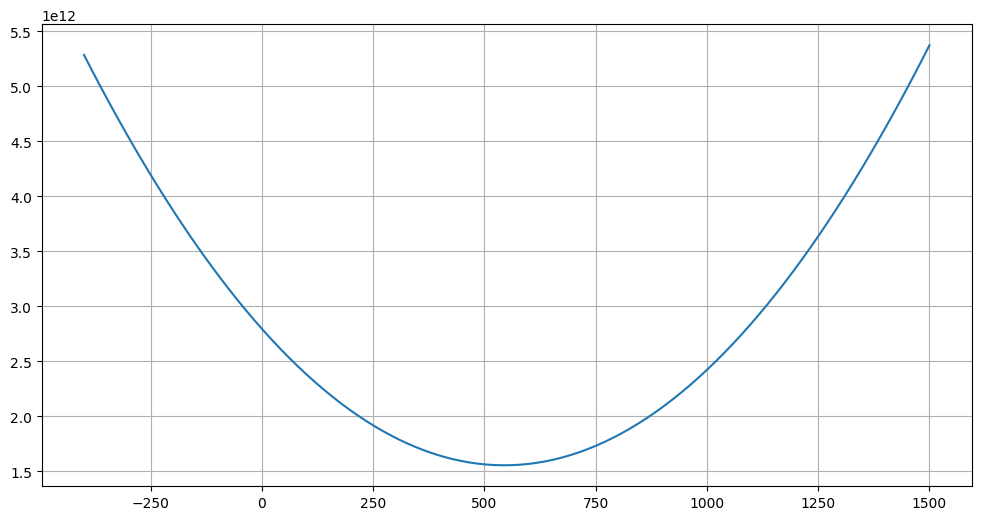

In [418]:
x = weight[1]
y = [ loss_fuction( weight=(weight[0], w), df=df_clear, columns=data_columns ) for w in x ]
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(x,y)

## 3D

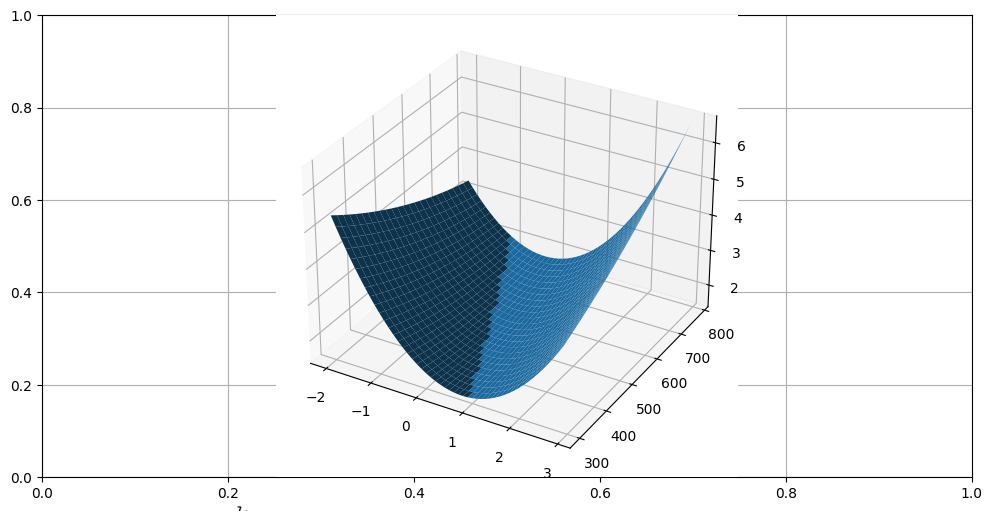

In [379]:
grid_w_0 = np.arange(-2000000, 3000000, 100000)
grid_w_1 = np.arange(300.0, 800.0, 20)

weight = np.meshgrid(grid_w_0, grid_w_1)

coord_z = loss_fuction(weight, df_clear, data_columns)

fig = plt.figure(figsize=(12,6))
plt.grid()
ax = fig.add_subplot(projection = "3d")
ax.plot_surface(weight[0], weight[1], coord_z)
plt.show()

## Gradiaent step

In [349]:
def grad_step(weight, grads, learning_rate=0.001):
  w_0, w_1 = weight
  grad_0, grad_1 = grads

  w_0 = w_0 - learning_rate*grad_0
  w_1 = w_1 - learning_rate*grad_1
  # weight = weight - grads * learning_rate

  return (w_0, w_1)

In [347]:
def grad_w_0(weight, df, columns=("PROPERTYSQFT", "PRICE")):
  n = df.shape[0]
  cost = 0
  for x, y in zip(df[columns[0]], df[columns[1]]):
    params = (x,)
    cost += (h(weight,params) - y)
  return cost/n

def grad_w_1(weight, df, columns=("PROPERTYSQFT", "PRICE")):
  n = df.shape[0]
  cost = 0
  for x, y in zip(df[columns[0]], df[columns[1]]):
    params = (x,)
    cost += (h(weight,params) - y)*x
  return cost/n


In [458]:
def grad_descent(weight, df, num_iter, learning_rate=0.01, epsilon=0.01, columns=("PROPERTYSQFT", "PRICE")):
  loss = loss_fuction(weight, df)
  history_loss = [loss]
  for i in range(num_iter):
    grads = (
        grad_w_0(weight, df, columns),
        grad_w_1(weight, df, columns)
        )
    # grad
    weight = grad_step(weight, grads, learning_rate=learning_rate)
    loss = loss_fuction(weight, df, columns)
    delta = abs(loss-history_loss[-1])
    if  delta < epsilon:
      print(f"{delta=}, {epsilon=}")
      history_loss.append(loss)
      break
    history_loss.append(loss)
  return weight, history_loss


In [376]:
weight = (0, 0)
weight, history_loss = grad_descent(weight, df_clear, num_iter=100, epsilon=0.0000001, columns=data_columns)
print(f"{weight=}")
print(f"{history_loss=}")

weight=(1409.7728193411265, 4551850.968975245)
history_loss=[2795436087167.7515, 8.658915800952704e+19]


## Normalization

In [377]:
def normalization(data):
  mean = data.mean()
  value_range = data.max()-data.min()
  # result = []
  # for x in data:
  #   norm_x = (x - mean) / value_range
  #   result.append(norm_x)
  result = [ (x - mean) / value_range  for x in data ]
  return result

In [371]:
# data_columns=("PROPERTYSQFT", "PRICE")
norm = pd.DataFrame()
for col in data_columns:
  norm[col] = normalization(df_clear[col])

norm.sample(2)

,PROPERTYSQFT,PRICE
2100,0.001797,-0.027842
3774,-0.021232,-0.040931


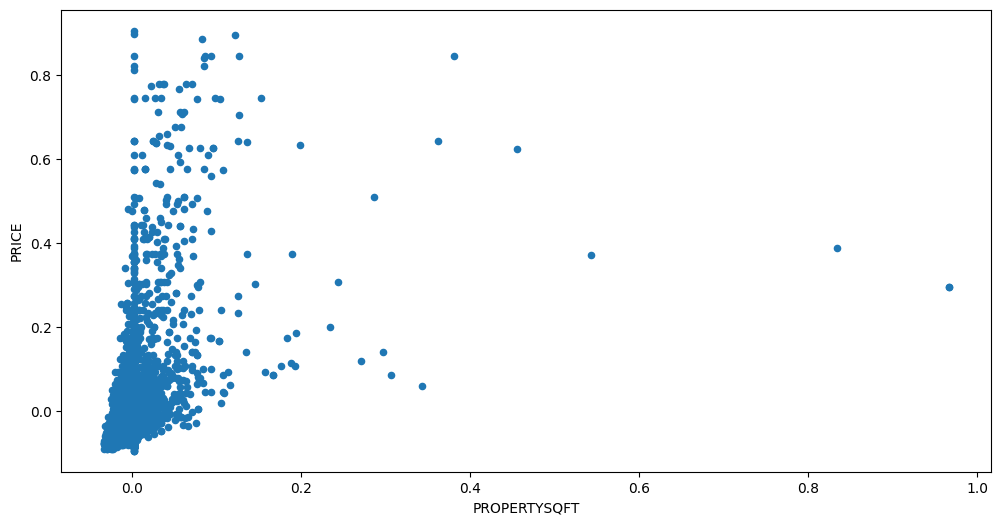

In [578]:
norm.plot(x=data_columns[0], y=data_columns[1], kind='scatter', figsize=(12,6))
plt.show()

### 3D Normalized

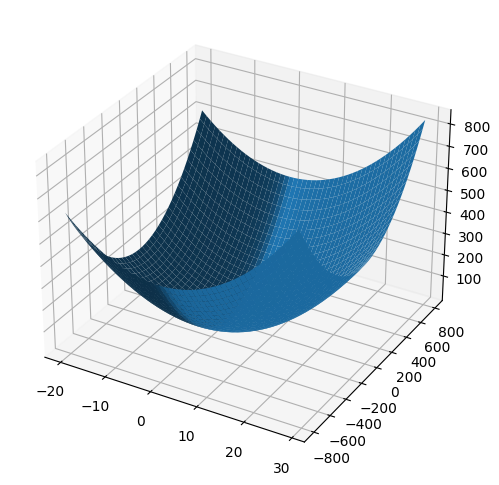

In [397]:
grid_w_0 = np.arange(-20, 30, 1)
grid_w_1 = np.arange(-800.0, 800.0, 10)

weight = np.meshgrid(grid_w_0, grid_w_1)

coord_z = loss_fuction(weight, norm, data_columns)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(projection = "3d")
ax.plot_surface(weight[0], weight[1], coord_z)
plt.show()

### loss function

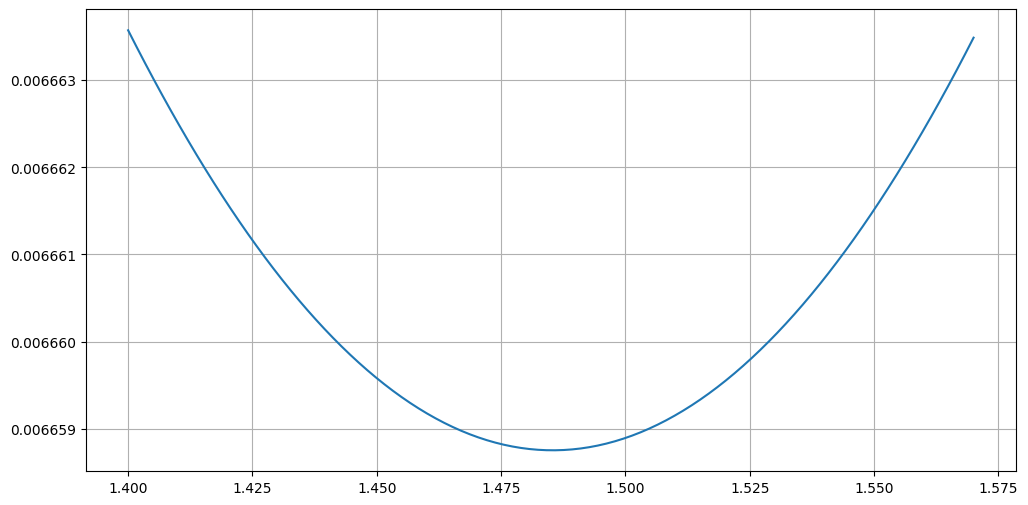

In [459]:
weight = (0, np.linspace(1.4, 1.570, 100))
x = weight[1]
y = [ loss_fuction( weight=(weight[0], w), df=norm, columns=data_columns ) for w in x ]
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(x,y)

## Model training

In [537]:
weight = (0, 0)
weight, history_loss = grad_descent(weight, norm, num_iter=1000, learning_rate=2,  epsilon=.000000000001, columns=data_columns)
print(f"{weight=}")
print(f" {len(history_loss)=}, {history_loss[:5]=}")

weight=(-6.154865258382202e-16, 1.3803624021203686)
 len(history_loss)=1001, history_loss[:5]=[0.00811814641673603, 0.008110434071446085, 0.008102762482975876, 0.008095131435940971, 0.008087540716095213]


## Visualization

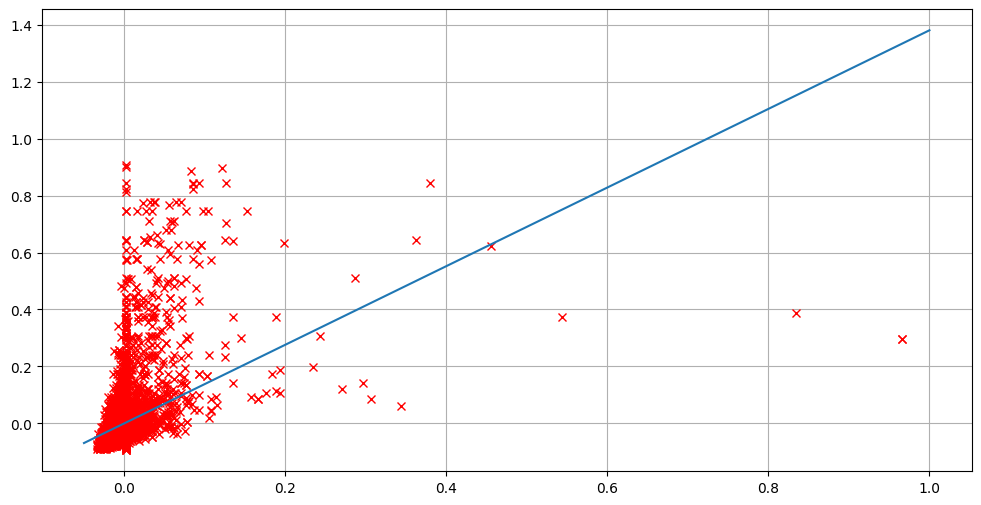

In [572]:
plt.figure(figsize=(12,6))
plt.plot(norm[data_columns[0]], norm[data_columns[1]], 'rx')
x = np.linspace(-0.05,1,500)
plt.plot(x, h(weight,(x,)))
plt.grid()
plt.show()

### Learing curve

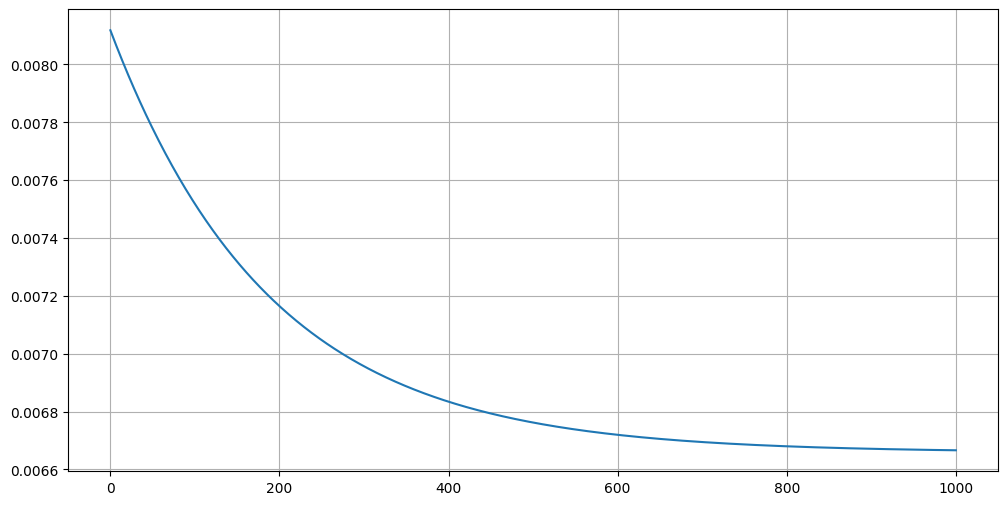

In [539]:
plt.figure(figsize=(12,6))
plt.plot(history_loss)
plt.grid()
plt.show()

In [570]:
weight_pt, history_loss = grad_descent(weight, norm, num_iter=2500, learning_rate=2,  epsilon=.0000000001, columns=data_columns)
weight_pt


delta=9.98865113885361e-11, epsilon=1e-10


(9.91649789795371e-18, 1.480046401076707)

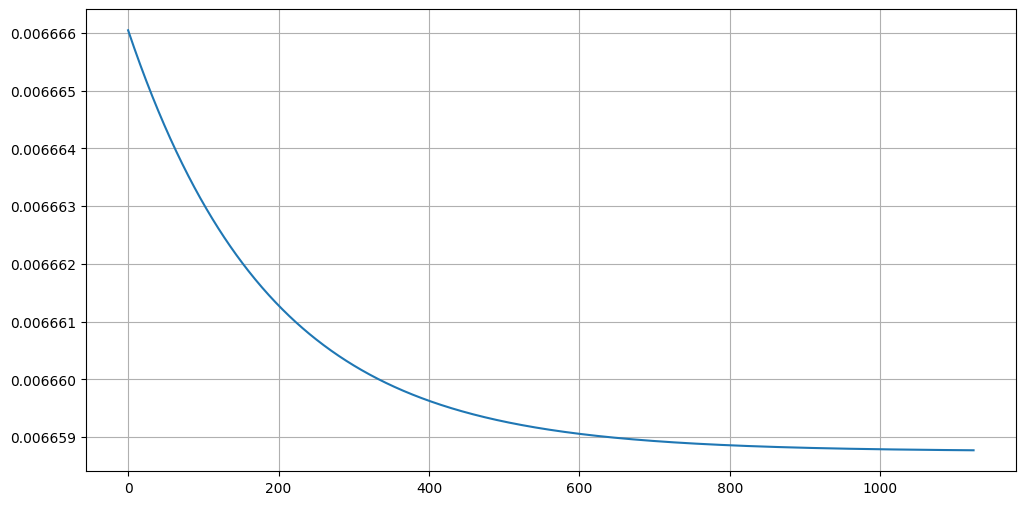

In [571]:
plt.figure(figsize=(12,6))
plt.plot(history_loss)
plt.grid()
plt.show()

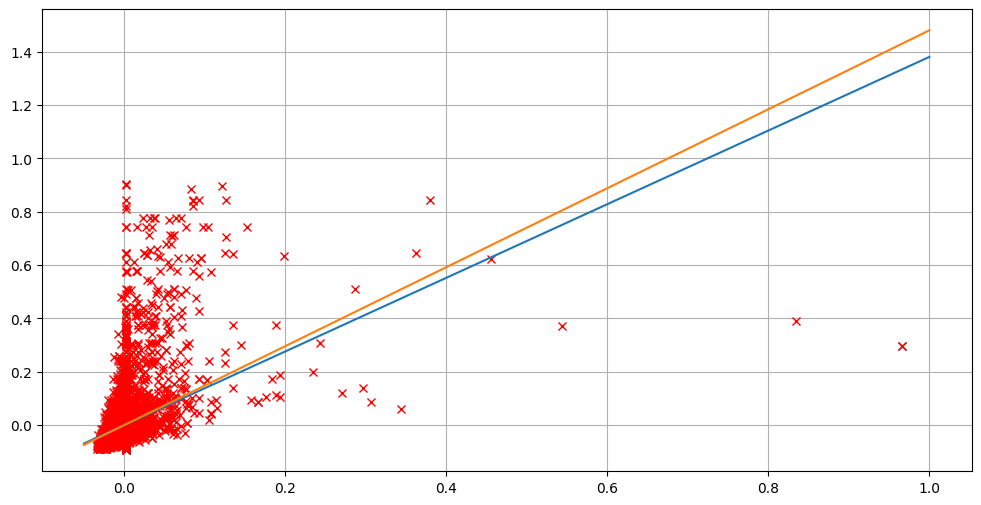

In [600]:
plt.figure(figsize=(12,6))
plt.plot(norm[data_columns[0]], norm[data_columns[1]], 'rx')
x = np.linspace(-0.05,1,500)
plt.plot(x, h(weight,(x,)))
plt.plot(x, h(weight_pt,(x,)))
plt.grid()
plt.show()

# SKI-KIT LEARN

In [576]:
from sklearn import linear_model

In [595]:
model = linear_model.LinearRegression()

In [594]:
X = np.array([norm[data_columns[0]]]).T
X.shape

(4705, 1)

In [593]:
Y = np.array(norm[data_columns[1]])
Y.shape

(4705,)

In [596]:
model.fit(X,Y)

LinearRegression()

In [605]:
model.coef_

array([1.48537787])

In [601]:
model.intercept_

1.9208563139146015e-18

In [611]:
model.coef_[0] - weight[1]

0.1050154644855732

In [612]:
model.coef_[0] - weight_pt[1]

0.005331465529234913

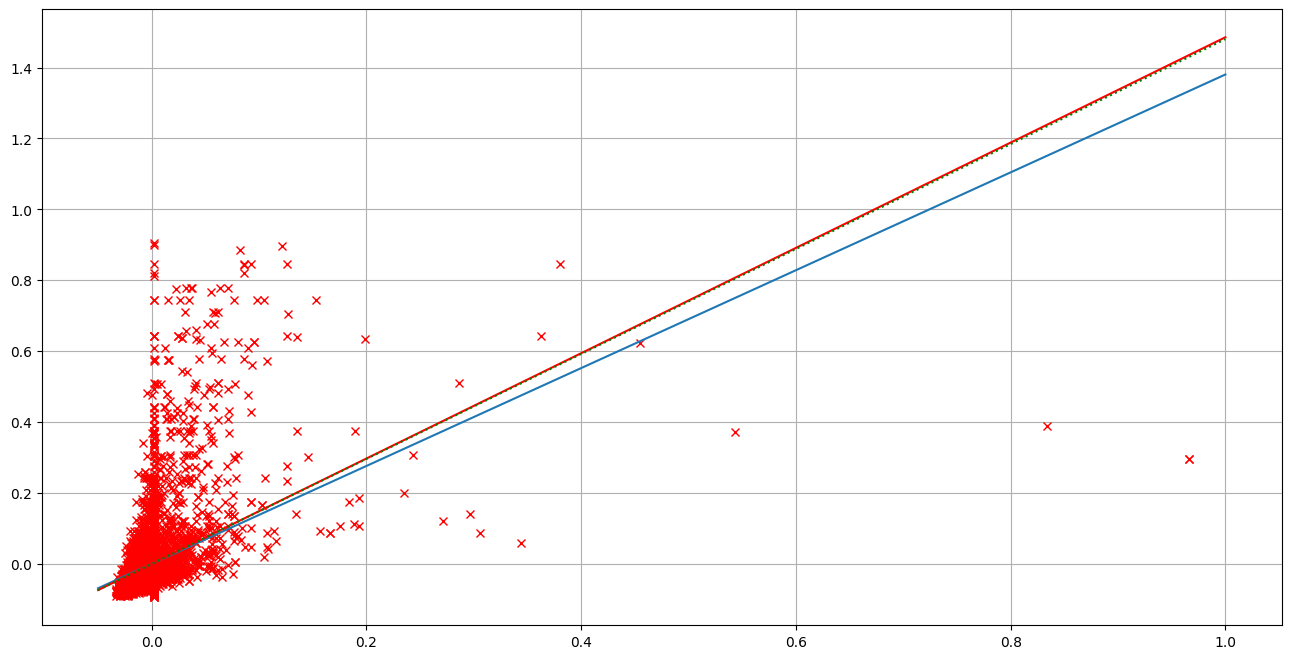

In [623]:
plt.figure(figsize=(16,8))
plt.plot(norm[data_columns[0]], norm[data_columns[1]], 'rx')
x = np.linspace(-0.05,1,500)
plt.plot(x, h(weight,(x,)))
plt.plot(x, h((model.intercept_, model.coef_[0]),(x,)), "r-")
plt.plot(x, h(weight_pt,(x,)), "g:")
plt.grid()
plt.show()